# Analyzing Twitter data

These notes are based on a course [Analyzing Social Media in Python](https://www.datacamp.com/courses/analyzing-social-media-data-in-python) offered by [DataCamp](https://www.datacamp.com/home).

## Collecting data through the Twitter API

APIs, or Application Programming Interfaces, are methods of accessing data from business of government organization.

### Twitter APIs

Twitter has multiple APIs which can be used for different purposes. These change from time to time and Twitter sometimes adds or removes APIs.

Twitter APIs include:

* REST API (Representational State Transfer). Twitter's REST API allows the user to "read and write Twitter data". 

* Search API (allows access to tweets for the past week)

* Ads API (focuses on Twitter adds)

* Streaming API (allows to collect a sample of tweets in real-time based on keywords, user IDs, and locations)

### Streaming API

**Streaming API** allows you to collect a sample of tweets in **real-time** based on keywords, user IDs, and locations. 

In particular, we can use the **public stream**, which Twitter's API documentation states "streams of the public data flowing through Twitter". The public stream itself contains a number of options. As we want to read and process tweets, we'll want to use the GET statuses/sample API, which "Returns a small random sample of all public statuses."

If you wanted to access absolutely all public statuses, you would need to use Twitter's Firehose API, which is not publicly available, and would most likely cost you a pretty penny.

The connection to streaming API remains open until you close it.

The streaming API has 2 endpoints:

**filter endpoint:**

* keywords (few hundred)
   
* usernames (a few thousands)
    
* location ranges (25)


**sample endpoint:**

* random 1% sample of all of Twitter

### Collecting data from Streaming API using `tweepy`

To collect data from streaming API you can use a package called `tweepy`

`tweepy` abstract away much of the work we need to set up a stable Twitter Streaming API connection.

`tweepy` requires an object called `SListener` which tells it how to handle incoming data.

#### Initializing Twitter API via OAuth

OAuthentification, the authentification protocol which the Twitter API uses, requires 4 tokens which can be obtained from [Twitter developer](https://developer.twitter.com/en.html) site:

* consumer key

* consumer secret

* access token

* access token secret

We pass our consumer key and consumer secret to '`OAuthHandler'`, and then set the access token and the access token secret.

Finally, the `'auth'` object (OAuthHandler instance) needs to be passed to the `tweepy` `'API'` object.

#### Function to connect to Twitter API

In [1]:
from tweepy import OAuthHandler, API, Cursor
import json

def twitter_connect():
    """
    establishes connection to Twitter API and returns an instance of API
    :return: auth, api -- an instance of OAuthHandler and of an API
    """
    # access credentials for Twitter API (these can be ontained via a Twitter dev account)
    access_token = ''        # insert your access token here
    access_token_secret = '' # insert your access token secret here
    consumer_key = ''        # insert your consumer key here
    consumer_secret = ''     # inseet your consumer secret here

    # initialize OAuthHandler from tweepy
    auth = OAuthHandler(consumer_key, consumer_secret)
    print("---OAuthhandler initialized...")
    auth.set_access_token(access_token, access_token_secret)
    print("Access token set.")

    # open a new API connection
    api = API(auth)
    print("---An API is initialized...")

    # print tweets from my own timeline
    print("Tweets from my own timeline:")
    for tweet in Cursor(api.user_timeline).items(3):
        # process a single status
        print(tweet.text)

    return auth, api


In [18]:
auth, api = twitter_connect()

---OAuthhandler initialized...
Access token set.
---An API is initialized...
Tweets from my own timeline:
Медузы и жопы: https://t.co/t7R6Wbtd4v


#### Retriving your own Twitter data

The following contents are borrowed from Marco Bonzanini's blog which can be found here [here](https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/).

Tweepy provides the convenient **Cursor interface** to iterate through different types of objects. We’re using 10 to limit the number of tweets we’re reading, but we can of course access more. 

The **status variable** is an instance of the Status() class, a **nice wrapper to access the data**. The **JSON response** from the Twitter API is **available in the attribute \_json** (with a leading underscore), which is _not the raw JSON string, but a dictionary_.

##### Retrieving your own home timeline

In [19]:
for status in Cursor(api.home_timeline).items(3):
    # process a single status
    print(status.text)

While high-speed trains are struggling to gain a foothold in some parts of the world, France’s superfast rail servi… https://t.co/RudMt4XLQ5
Science explains why hipsters all end up looking the same. https://t.co/c4jR9yKrj2
The backlash to the HQ2 process shows we need to put incentives behind us, @Richard_Florida writes—but that’s just… https://t.co/gWPIL6zxRw


##### Retrieving your own tweets

In [13]:
for tweet in Cursor(api.user_timeline).items(3):
    # process a single status
    print(tweet.text)

Медузы и жопы: https://t.co/t7R6Wbtd4v


##### Process or store tweets as JSON

In [20]:
def process_or_store(tweet):
    """
    placeholder for a function to process or store tweets 
    """
    print(json.dumps(tweet))

In [21]:
for tweet in Cursor(api.user_timeline).items(3):
    # process a single status
    process_or_store(tweet._json)

{"created_at": "Sun Feb 03 18:28:13 +0000 2019", "id": 1092127633863790592, "id_str": "1092127633863790592", "text": "\u041c\u0435\u0434\u0443\u0437\u044b \u0438 \u0436\u043e\u043f\u044b: https://t.co/t7R6Wbtd4v", "truncated": false, "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [{"url": "https://t.co/t7R6Wbtd4v", "expanded_url": "http://sunandstuff.com/mandelbrot/about/", "display_url": "sunandstuff.com/mandelbrot/abo\u2026", "indices": [15, 38]}]}, "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 826419612397031424, "id_str": "826419612397031424", "name": "Stepan Oskin", "screen_name": "StepanOskin", "location": "Toronto, Ontario", "description": "", "url": null, "entities": {"description": {"urls": []}}, "protected": false, "followers_count": 2, "fr

#### Streaming

#### Stream listener from DataCamp

Can be found [here](https://github.com/SocialDataAnalytics-Winter2018/lab04/blob/master/slistener.py)

In case we want to “keep the connection open”, and gather all the upcoming tweets about a particular event, the streaming API is what we need. We need to extend the StreamListener() to customise the way we process the incoming data. A working example that gathers all the new tweets with the #chocosol hashtag:

##### Defining stream listener

`'SListener'` object inherits from a general `'Stream Listener'` class included with `tweepy`. It opens a new timestamped file in which to store tweets and takes an optional API argument.

In [8]:
from tweepy import Stream, OAuthHandler, API, Cursor
from tweepy.streaming import StreamListener
import json
import time


class SListener(StreamListener):
    def __init__(self, api = None, fprefix = 'streamer'):
        super(SListener, self).__init__()
        self.api = api or API()
        self.counter = 0
        self.fprefix = fprefix
        self.output  = open('data_streamer/%s_%s.json'
                            % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')),
                            'w')

    def on_data(self, data):
        if 'in_reply_to_status' in data:
            self.on_status(data)
        elif 'delete' in data:
            delete = json.loads(data)['delete']['status']
            if self.on_delete(delete['id'], delete['user_id']) is False:
                return False
        elif 'limit' in data:
            if self.on_limit(json.loads(data)['limit']['track']) is False:
                return False
        elif 'warning' in data:
            warning = json.loads(data)['warnings']
            print("WARNING: %s" % warning['message'])
            return

    def on_status(self, status):
        self.output.write(status)
        self.counter += 1
        if self.counter >= 20000:
            self.output.close()
            self.output = open('data_streamer/%s_%s.json'
                               % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')),
                               'w')
            self.counter = 0
        return

    def on_delete(self, status_id, user_id):
        print("Delete notice")
        return

    def on_limit(self, track):
        print("WARNING: Limitation notice received, tweets missed: %d" % track)
        return

    def on_error(self, status_code):
        print('Encountered error with status code:', status_code)
        return

    def on_timeout(self):
        print("Timeout, sleeping for 60 seconds...")
        time.sleep(60)
        return

#### Running stream listener to collect tweets from Twitter API

In [ ]:
auth, api = twitter_connect()

keywords_to_track = ['#aplle', '#iphone', '#applemusic', '#ios', '#ipad', '@iPhoneinCanada',
                     '@Apple', '@AppleSupport', '@tim_cook', '@AngelaAhrendts', '@cue', '@pschiller',
                     '@AppleMusic', '@AppleNews', '@AppleNewsAU', '@AppleNewsUK',
                     '@AppStore', '@AppStoreGames']

# initialize a new instance of stream listener
listen = SListener(api, fprefix='streamer_apple')

# open a new Twitter Stream
stream = Stream(auth, listen)
print("\n---New Twitter stream opened using 'SListener' as stream listener.")

# take a random sample of all of Twitter using the 'sample' endpoint
# print("Streaming random 1% sample of all Twitter.")
# stream.sample()

# track keywords
print("\n---Tracking keywords: {0}".format(keywords_to_track))
stream.filter(track=keywords_to_track)

## Reading JSON files created by Stream Listener

A common format in which the data is returned by an API is JSON, or Java Script Object Notation. JSON is a **special file format** that is **both human-readable and easily transferred between machines**. JSON is structured a lot like Python objects, with dictionaries and lists being the main objects. 

In [2]:
import os
import glob

In [3]:
os.listdir()

['.git',
 '.gitattributes',
 '.idea',
 '.ipynb_checkpoints',
 'data_streamer',
 'st_class.py',
 'twitter-private.ipynb']

In [4]:
os.chdir('data_streamer')
os.listdir()

['streamer_20190301-004914.json',
 'streamer_20190301-005130.json',
 'streamer_apple_20190301-235838.json',
 'streamer_apple_20190302-111807.json',
 'streamer_apple_20190303-015950.json',
 'streamer_jetblue_20190301-005541.json',
 'streamer_jetblue_20190301-165936.json',
 'tweets_2019-02-28__22-43-02_#jetblue.json',
 'tweets_2019-02-28__22-46-05_#jetblue.json',
 'tweets_2019-02-28__22-50-22_#apple.json',
 'tweets_20190228-220948.json',
 'tweets_20190228-222508.json']

In [5]:
files = glob.glob('*.json', )
files

['streamer_20190301-004914.json',
 'streamer_20190301-005130.json',
 'streamer_apple_20190301-235838.json',
 'streamer_apple_20190302-111807.json',
 'streamer_apple_20190303-015950.json',
 'streamer_jetblue_20190301-005541.json',
 'streamer_jetblue_20190301-165936.json',
 'tweets_2019-02-28__22-43-02_#jetblue.json',
 'tweets_2019-02-28__22-46-05_#jetblue.json',
 'tweets_2019-02-28__22-50-22_#apple.json',
 'tweets_20190228-220948.json',
 'tweets_20190228-222508.json']

In [6]:
stream_file = 'streamer_apple_20190301-235838.json'

tweets_data = []

with open(stream_file, "r") as tweets_file:
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
        

len(tweets_data)

20000

In [7]:
import pandas as pd

In [8]:
# create an empty DataFrame
tweets = pd.DataFrame()

tweets['user'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

tweets.head()

,user,text,lang,country
0,T6lAfHqT9GDda0K,RT @billieeilish: Miss Billie’s interview on @...,en,None
1,T6lAfHqT9GDda0K,RT @billieeilish: Tune in to @Beats1 @applemus...,en,None
2,SlapJunkie,RT @Paperchase2014: New New New #iTunes #Apple...,en,None
3,xpm3V9Muq7TWgdw,スマホスピタル鹿児島\n・鹿児島市東千石町8-18Rストーンビル3F\n・tel 099-2...,ja,None
4,thomasorlina,RT @solangeknowles: “When I Get Home “ a Texas...,en,None


In [19]:
tweets.tail()

,user,text,lang,country
19995,AnasAlTukhaifi,RT @OfficeNews: Data entry just became easier!...,en,None
19996,KidDotCo,#WizKids have #FUN with #Maths! \n\nhttps://t....,en,None
19997,dkathunt,RT @jessicashortall: Oh my God https://t.co/kk...,en,None
19998,cheslenegorg,RT @jcpunongbayan: WHAT SORCERY IS THIS https:...,en,None
19999,iTrackr_fr,iPhon : La ligue de Hockey US s’affiche en pho...,fr,None


In [15]:
tweets['text'].str.contains('#apple').sum()

536

In [16]:
tweets[tweets['text'].str.contains('#apple')].head()

,user,text,lang,country
54,mdxapps,"#Cool iMagic Trick for the iPhone, iPad &amp; ...",en,None
75,iMagicTrickApp,iMagic Trick #app for the iPhone and Apple Wat...,en,None
118,EasyTechLux,All of Apple's big announcements from WWDC 201...,en,None
147,MichaelKnotts17,👁😱👺 #AppleEvent #Apple #AppleIconSiam #AppleWa...,und,None
213,Abesmit99660733,RT @MichaelKnotts17: 👁😱👺 #AppleEvent #Apple #A...,und,None


In [14]:
tweets['text'].str.contains('@tim_cook').sum()

217

In [18]:
tweets[tweets['text'].str.contains('@tim_cook')].head()

,user,text,lang,country
5,SergeyGlotov7,@wylsacom @tim_cook Это он про новый iPad Mini.,ru,None
117,rycaut,"in person @tim_cook is impressive - calm, funn...",en,United States
299,Clauss1Michael,@matt_klein18 @tim_cook Emotions are as necess...,en,None
309,SRIJANG87019575,@tim_cook \nI have created a design for new AT...,en,None
538,cwfrederick,@tim_cook I ❤️ Apple and I’m a fan of @tim_coo...,en,None


In [9]:
import matplotlib.pyplot as plt

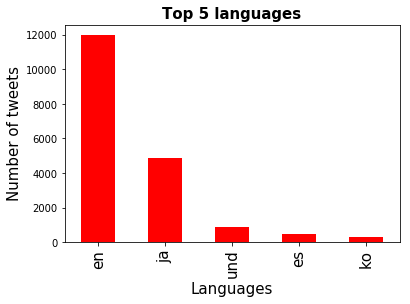

In [10]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

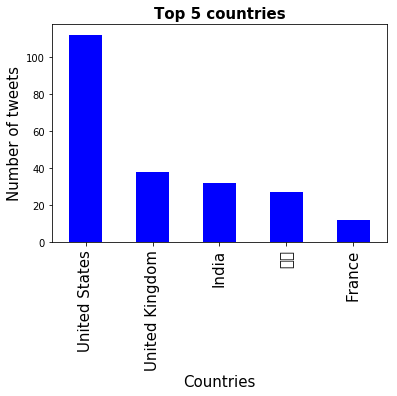

In [11]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')